In [16]:
import numpy as np
import keras
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt

In [17]:
dataset = pd.read_csv('./dataset/Churn_Modelling.csv')
x = dataset.iloc[:, 3:-1].values
y = dataset.iloc[:, -1].values

In [18]:
print(dataset)

      RowNumber  CustomerId    Surname  CreditScore Geography  Gender  Age  \
0             1    15634602   Hargrave          619    France  Female   42   
1             2    15647311       Hill          608     Spain  Female   41   
2             3    15619304       Onio          502    France  Female   42   
3             4    15701354       Boni          699    France  Female   39   
4             5    15737888   Mitchell          850     Spain  Female   43   
...         ...         ...        ...          ...       ...     ...  ...   
9995       9996    15606229   Obijiaku          771    France    Male   39   
9996       9997    15569892  Johnstone          516    France    Male   35   
9997       9998    15584532        Liu          709    France  Female   36   
9998       9999    15682355  Sabbatini          772   Germany    Male   42   
9999      10000    15628319     Walker          792    France  Female   28   

      Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMemb

In [19]:
dataset = pd.read_csv('./dataset/Churn_Modelling.csv')
x = dataset.iloc[:, 3:-1].values
y = dataset.iloc[:, -1].values

In [20]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
x[:, 2] = le.fit_transform(x[:, 2])


In [21]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [1])], remainder='passthrough')
x = np.array(ct.fit_transform(x))
x

array([[1.0, 0.0, 0.0, ..., 1, 1, 101348.88],
       [0.0, 0.0, 1.0, ..., 0, 1, 112542.58],
       [1.0, 0.0, 0.0, ..., 1, 0, 113931.57],
       ...,
       [1.0, 0.0, 0.0, ..., 0, 1, 42085.58],
       [0.0, 1.0, 0.0, ..., 1, 0, 92888.52],
       [1.0, 0.0, 0.0, ..., 1, 0, 38190.78]], dtype=object)

In [22]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)
print(X_train)
print(y_train)
print(X_train.dtype, y_train.dtype)
X_train = X_train.astype('float32')



[[0.0 0.0 1.0 ... 1 0 163830.64]
 [0.0 1.0 0.0 ... 1 1 57098.0]
 [1.0 0.0 0.0 ... 1 0 185630.76]
 ...
 [1.0 0.0 0.0 ... 1 0 181429.87]
 [0.0 0.0 1.0 ... 1 1 148750.16]
 [0.0 1.0 0.0 ... 1 0 118855.26]]
[0 0 0 ... 0 0 1]
object int64


In [39]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
print(X_train)


[[-1.0146067  -0.56984437  1.7430905  ...  0.642595   -1.0322704
   1.1064317 ]
 [-1.0146067   1.754865   -0.5736937  ...  0.642595    0.9687384
  -0.74866444]
 [ 0.9856036  -0.56984437 -0.5736937  ...  0.642595   -1.0322704
   1.4853348 ]
 ...
 [ 0.9856036  -0.56984437 -0.5736937  ...  0.642595   -1.0322704
   1.41232   ]
 [-1.0146067  -0.56984437  1.7430905  ...  0.642595    0.9687384
   0.8443212 ]
 [-1.0146067   1.754865   -0.5736937  ...  0.642595   -1.0322704
   0.3247246 ]]


Epoch 1/100
250/250 [==============================] - 2s 3ms/step - loss: 0.5779 - accuracy: 0.7460
Epoch 2/100
250/250 [==============================] - 1s 2ms/step - loss: 0.4831 - accuracy: 0.7976
Epoch 3/100
250/250 [==============================] - 0s 2ms/step - loss: 0.4479 - accuracy: 0.8048
Epoch 4/100
250/250 [==============================] - 1s 3ms/step - loss: 0.4276 - accuracy: 0.8129
Epoch 5/100
250/250 [==============================] - 1s 2ms/step - loss: 0.4127 - accuracy: 0.8254
Epoch 6/100
250/250 [==============================] - 0s 2ms/step - loss: 0.4029 - accuracy: 0.8295
Epoch 7/100
250/250 [==============================] - 1s 2ms/step - loss: 0.3930 - accuracy: 0.8336
Epoch 8/100
250/250 [==============================] - 1s 2ms/step - loss: 0.3845 - accuracy: 0.8385
Epoch 9/100
250/250 [==============================] - 1s 2ms/step - loss: 0.3768 - accuracy: 0.8440
Epoch 10/100
250/250 [==============================] - 1s 2ms/step - loss: 0.3704 - accura

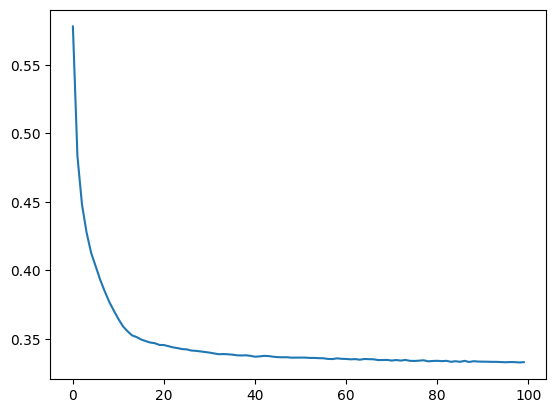

In [40]:
ann = tf.keras.models.Sequential()
ann.add(tf.keras.layers.Dense(units=6, activation='relu'))
ann.add(tf.keras.layers.Dense(units=6, activation='relu'))
ann.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))
ann.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
adam_history = ann.fit(X_train, y_train, batch_size=32, epochs=100)
plt.plot(adam_history.history['loss'])


Epoch 1/100
250/250 [==============================] - 1s 3ms/step - loss: 0.6145 - accuracy: 0.7960
Epoch 2/100
250/250 [==============================] - 1s 2ms/step - loss: 0.6015 - accuracy: 0.7960
Epoch 3/100
250/250 [==============================] - 0s 2ms/step - loss: 0.5923 - accuracy: 0.7960
Epoch 4/100
250/250 [==============================] - 1s 2ms/step - loss: 0.5847 - accuracy: 0.7960
Epoch 5/100
250/250 [==============================] - 1s 2ms/step - loss: 0.5783 - accuracy: 0.7960
Epoch 6/100
250/250 [==============================] - 1s 3ms/step - loss: 0.5727 - accuracy: 0.7960
Epoch 7/100
250/250 [==============================] - 1s 3ms/step - loss: 0.5676 - accuracy: 0.7960
Epoch 8/100
250/250 [==============================] - 1s 3ms/step - loss: 0.5631 - accuracy: 0.7960
Epoch 9/100
250/250 [==============================] - 1s 2ms/step - loss: 0.5590 - accuracy: 0.7960
Epoch 10/100
250/250 [==============================] - 1s 2ms/step - loss: 0.5553 - accura

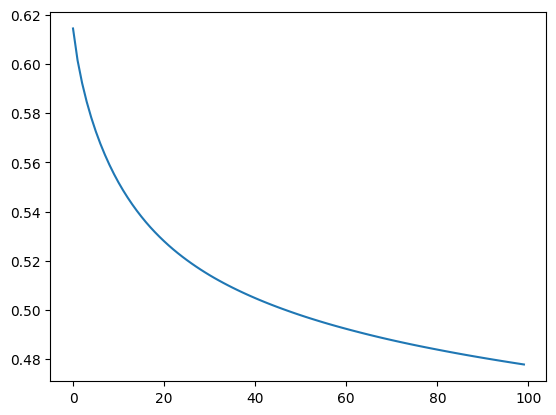

In [41]:
ann = tf.keras.models.Sequential()
ann.add(tf.keras.layers.Dense(units=6, activation='relu'))
ann.add(tf.keras.layers.Dense(units=6, activation='relu'))
ann.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))
ann.compile(optimizer='adagrad', loss='binary_crossentropy', metrics=['accuracy'])

adagrad_history = ann.fit(X_train, y_train, batch_size = 32, epochs = 100)
plt.plot(adagrad_history.history['loss'])




Epoch 1/100
250/250 [==============================] - 1s 2ms/step - loss: 0.5581 - accuracy: 0.7960
Epoch 2/100
250/250 [==============================] - 1s 2ms/step - loss: 0.5068 - accuracy: 0.7960
Epoch 3/100
250/250 [==============================] - 0s 2ms/step - loss: 0.4879 - accuracy: 0.7960
Epoch 4/100
250/250 [==============================] - 1s 2ms/step - loss: 0.4775 - accuracy: 0.7960
Epoch 5/100
250/250 [==============================] - 0s 2ms/step - loss: 0.4699 - accuracy: 0.7960
Epoch 6/100
250/250 [==============================] - 0s 2ms/step - loss: 0.4637 - accuracy: 0.7960
Epoch 7/100
250/250 [==============================] - 0s 2ms/step - loss: 0.4585 - accuracy: 0.7960
Epoch 8/100
250/250 [==============================] - 1s 2ms/step - loss: 0.4540 - accuracy: 0.7960
Epoch 9/100
250/250 [==============================] - 1s 2ms/step - loss: 0.4502 - accuracy: 0.7960
Epoch 10/100
250/250 [==============================] - 0s 2ms/step - loss: 0.4468 - accura

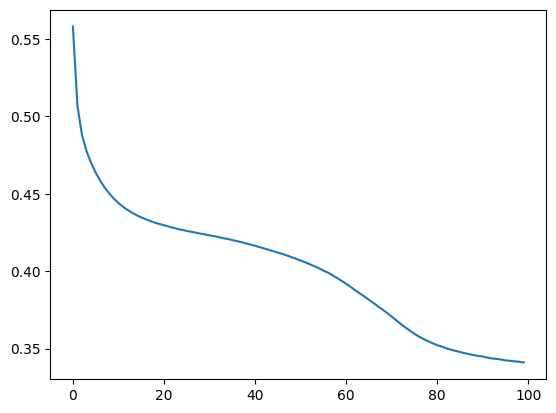

In [42]:
ann = tf.keras.models.Sequential()
ann.add(tf.keras.layers.Dense(units=6, activation='relu'))
ann.add(tf.keras.layers.Dense(units=6, activation='relu'))
ann.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))
ann.compile(optimizer = 'SGD',  loss = 'binary_crossentropy', metrics = ['accuracy'])
SGD_history = ann.fit(X_train, y_train, batch_size = 32, epochs = 100)
plt.plot(SGD_history.history['loss'])

Epoch 1/100
250/250 [==============================] - 1s 2ms/step - loss: 0.5620 - accuracy: 0.7930
Epoch 2/100
250/250 [==============================] - 1s 3ms/step - loss: 0.4876 - accuracy: 0.7960
Epoch 3/100
250/250 [==============================] - 0s 2ms/step - loss: 0.4666 - accuracy: 0.7960
Epoch 4/100
250/250 [==============================] - 0s 2ms/step - loss: 0.4523 - accuracy: 0.7960
Epoch 5/100
250/250 [==============================] - 1s 2ms/step - loss: 0.4427 - accuracy: 0.7960
Epoch 6/100
250/250 [==============================] - 1s 2ms/step - loss: 0.4359 - accuracy: 0.7960
Epoch 7/100
250/250 [==============================] - 1s 2ms/step - loss: 0.4315 - accuracy: 0.7996
Epoch 8/100
250/250 [==============================] - 1s 2ms/step - loss: 0.4282 - accuracy: 0.8121
Epoch 9/100
250/250 [==============================] - 1s 2ms/step - loss: 0.4254 - accuracy: 0.8167
Epoch 10/100
250/250 [==============================] - 1s 3ms/step - loss: 0.4226 - accura

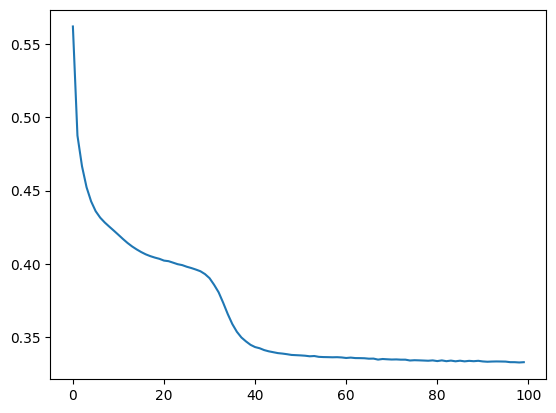

In [43]:
ann = tf.keras.models.Sequential()
ann.add(tf.keras.layers.Dense(units=6, activation='relu'))
ann.add(tf.keras.layers.Dense(units=6, activation='relu'))
ann.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))
ann.compile(optimizer = 'RMSprop', loss = 'binary_crossentropy', metrics = ['accuracy'])
RMSprop_history = ann.fit(X_train, y_train, batch_size = 32, epochs = 100)
plt.plot(RMSprop_history.history['loss'])

Epoch 1/100
250/250 [==============================] - 2s 2ms/step - loss: 0.4969 - accuracy: 0.7859
Epoch 2/100
250/250 [==============================] - 1s 2ms/step - loss: 0.4512 - accuracy: 0.7960
Epoch 3/100
250/250 [==============================] - 1s 2ms/step - loss: 0.4388 - accuracy: 0.7960
Epoch 4/100
250/250 [==============================] - 1s 2ms/step - loss: 0.4323 - accuracy: 0.7981
Epoch 5/100
250/250 [==============================] - 0s 2ms/step - loss: 0.4284 - accuracy: 0.8081
Epoch 6/100
250/250 [==============================] - 1s 3ms/step - loss: 0.4265 - accuracy: 0.8106
Epoch 7/100
250/250 [==============================] - 1s 2ms/step - loss: 0.4244 - accuracy: 0.8126
Epoch 8/100
250/250 [==============================] - 1s 2ms/step - loss: 0.4227 - accuracy: 0.8149
Epoch 9/100
250/250 [==============================] - 1s 2ms/step - loss: 0.4211 - accuracy: 0.8163
Epoch 10/100
250/250 [==============================] - 1s 2ms/step - loss: 0.4195 - accura

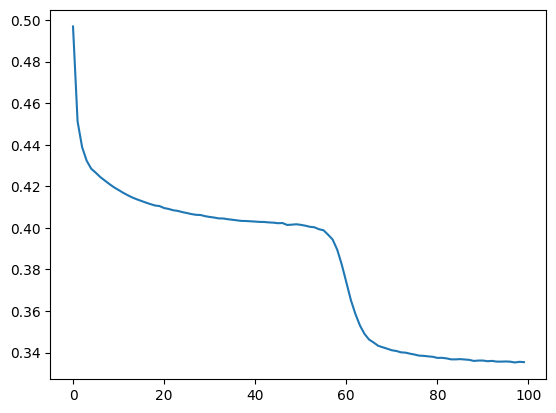

In [44]:
ann = tf.keras.models.Sequential()
ann.add(tf.keras.layers.Dense(units=6, activation='relu'))
ann.add(tf.keras.layers.Dense(units=6, activation='relu'))
ann.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))
ann.compile(optimizer = 'Nadam', loss = 'binary_crossentropy', metrics = ['accuracy'])
Nadam_history = ann.fit(X_train, y_train, batch_size = 32, epochs = 100)
plt.plot(Nadam_history.history['loss'])

0.3329037129878998
0.34099456667900085
0.47788652777671814


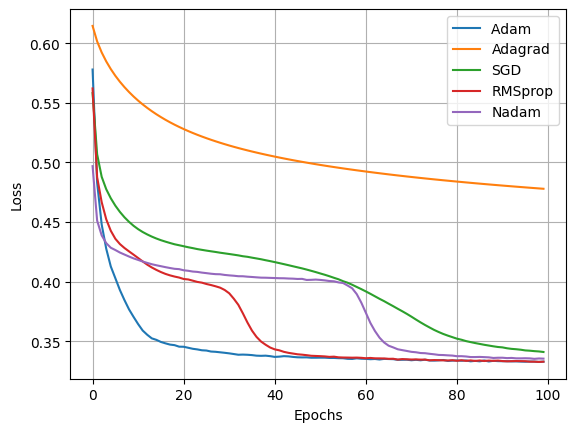

In [60]:
plt.plot(adam_history.history['loss'], label='Adam ' ,  )
plt.plot(adagrad_history.history['loss'], label='Adagrad')
plt.plot(SGD_history.history['loss'], label='SGD')
plt.plot(RMSprop_history.history['loss'], label='RMSprop')
plt.plot(Nadam_history.history['loss'], label='Nadam')
print( adam_history.history['loss'][-1] )
print(SGD_history.history['loss'][-1])
print(adagrad_history.history['loss'][-1])
plt.xlabel('Epochs' )
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

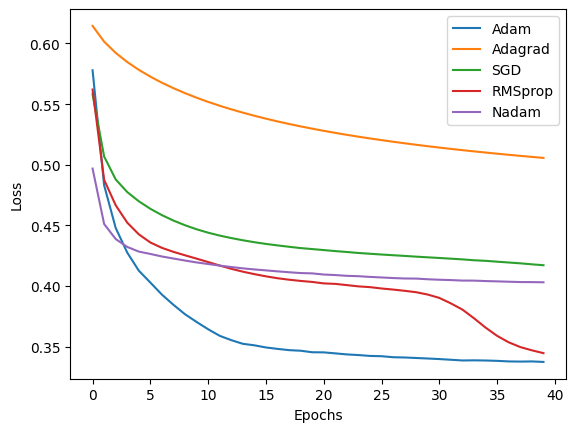

In [50]:
plt.plot(adam_history.history['loss'][0:40], label='Adam')
plt.plot(adagrad_history.history['loss'][0:40], label='Adagrad')
plt.plot(SGD_history.history['loss'][0:40], label='SGD')
plt.plot(RMSprop_history.history['loss'][0:40], label='RMSprop')
plt.plot(Nadam_history.history['loss'][0:40], label='Nadam')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()